In [1]:
## 高中英语读后写作文叙事能力发展分析

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, levene, f_oneway, tukey_hsd
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体和图表样式
#sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8')
plt.rcParams['font.family'] = 'sans-serif'          # 指定族
#plt.rcParams['font.sans-serif'] = ['SimHei']        # windows
plt.rcParams['font.sans-serif'] = ['PingFang HK']    # mac
plt.rcParams['axes.unicode_minus'] = False

# 设置随机种子确保结果可重现
np.random.seed(42)

print("=== 高中英语读后写作文叙事能力发展分析 ===")
print("=== 年级间差异性分析 (修正版) ===")

=== 高中英语读后写作文叙事能力发展分析 ===
=== 年级间差异性分析 (修正版) ===


In [3]:
# 1. 数据加载与预处理 - 修正版

def load_data_with_sheets():
    """加载所有数据文件，处理多张数据表的情况"""
    data_files = {
        '描述性统计': 'pre_data/1.描述性统计.xlsx',
        '微观叙事-词法': 'pre_data/2-1微观叙事-词法.xlsx',
        '微观叙事-句法': 'pre_data/2-2微观叙事-句法.xlsx',
        '宏观叙事-语篇连贯性': 'pre_data/3-1宏观叙事-语篇连贯性.xlsx',
        '宏观叙事-情境模型': 'pre_data/3-2宏观叙事-情境模型.xlsx',
        '宏观叙事-段落长度': 'pre_data/3-3宏观叙事-段落长度.xlsx'
    }
    
    data_dict = {}
    
    for name, file_path in data_files.items():
        try:
            # 读取Excel文件的所有工作表
            excel_file = pd.ExcelFile(file_path)
            sheet_names = excel_file.sheet_names
            
            print(f"\n✓ 成功加载: {name}")
            print(f"  文件路径: {file_path}")
            print(f"  工作表: {sheet_names}")
            
            # 检查是否包含年级相关的工作表
            grade_sheets = []
            for sheet in sheet_names:
                if any(keyword in sheet for keyword in ['高一', '高二', '高三', 'grade1', 'grade2', 'grade3']):
                    grade_sheets.append(sheet)
            
            if grade_sheets:
                print(f"  发现年级工作表: {grade_sheets}")
                
                # 合并所有年级数据，添加年级标识
                combined_data = []
                grade_mapping = {
                    '高一': 1, '高二': 2, '高三': 3,
                    'grade1': 1, 'grade2': 2, 'grade3': 3
                }
                
                for sheet in grade_sheets:
                    df_sheet = pd.read_excel(file_path, sheet_name=sheet)
                    
                    # 确定年级值
                    grade_value = None
                    for key, value in grade_mapping.items():
                        if key in sheet:
                            grade_value = value
                            break
                    
                    if grade_value:
                        # 添加年级列
                        df_sheet['年级'] = grade_value
                        combined_data.append(df_sheet)
                        print(f"    工作表 '{sheet}' -> 年级 {grade_value}, 数据形状: {df_sheet.shape}")
                
                if combined_data:
                    # 合并所有年级数据
                    final_df = pd.concat(combined_data, ignore_index=True)
                    data_dict[name] = final_df
                    print(f"  合并后总数据形状: {final_df.shape}")
                else:
                    print(f"  ⚠️ 警告: 无法处理年级数据")
                    # 如果无法处理，读取第一个工作表
                    df = pd.read_excel(file_path, sheet_name=sheet_names[0])
                    data_dict[name] = df
                    print(f"  使用第一个工作表，数据形状: {df.shape}")
            else:
                print(f"  ⚠️ 警告: 未发现年级工作表，使用第一个工作表")
                df = pd.read_excel(file_path, sheet_name=sheet_names[0])
                data_dict[name] = df
                print(f"  数据形状: {df.shape}")
                
        except Exception as e:
            print(f"✗ 加载失败: {name} - 错误: {e}")
    
    return data_dict

# 加载数据
data_dict = load_data_with_sheets()

# 显示每个数据文件的基本信息
for name, df in data_dict.items():
    print(f"\n{name} 数据预览:")
    print(f"列名: {list(df.columns)}")
    print(f"数据形状: {df.shape}")
    
    # 检查年级列
    if '年级' in df.columns:
        print(f"年级分布: {df['年级'].value_counts().sort_index()}")
    
    print(f"前5行数据:")
    print(df.head())
    print("-" * 50)


✓ 成功加载: 描述性统计
  文件路径: pre_data/1.描述性统计.xlsx
  工作表: ['高一', '高二', '高三']
  发现年级工作表: ['高一', '高二', '高三']
    工作表 '高一' -> 年级 1, 数据形状: (100, 4)
    工作表 '高二' -> 年级 2, 数据形状: (100, 4)
    工作表 '高三' -> 年级 3, 数据形状: (100, 4)
  合并后总数据形状: (300, 4)

✓ 成功加载: 微观叙事-词法
  文件路径: pre_data/2-1微观叙事-词法.xlsx
  工作表: ['高一', '高二', '高三']
  发现年级工作表: ['高一', '高二', '高三']
    工作表 '高一' -> 年级 1, 数据形状: (100, 10)
    工作表 '高二' -> 年级 2, 数据形状: (100, 10)
    工作表 '高三' -> 年级 3, 数据形状: (100, 10)
  合并后总数据形状: (300, 10)

✓ 成功加载: 微观叙事-句法
  文件路径: pre_data/2-2微观叙事-句法.xlsx
  工作表: ['高一', '高二', '高三']
  发现年级工作表: ['高一', '高二', '高三']
    工作表 '高一' -> 年级 1, 数据形状: (100, 13)
    工作表 '高二' -> 年级 2, 数据形状: (100, 13)
    工作表 '高三' -> 年级 3, 数据形状: (100, 13)
  合并后总数据形状: (300, 13)

✓ 成功加载: 宏观叙事-语篇连贯性
  文件路径: pre_data/3-1宏观叙事-语篇连贯性.xlsx
  工作表: ['高一', '高二', '高三']
  发现年级工作表: ['高一', '高二', '高三']
    工作表 '高一' -> 年级 1, 数据形状: (100, 10)
    工作表 '高二' -> 年级 2, 数据形状: (100, 10)
    工作表 '高三' -> 年级 3, 数据形状: (100, 10)
  合并后总数据形状: (300, 10)

✓ 成功加载: 宏观叙事-情境模型
  文件路径: pre_data

In [4]:
import os

# 如果目录不存在则创建
save_dir = "./pre_data"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 遍历data_dict，将每个DataFrame保存为csv文件
for name, df in data_dict.items():
    save_path = os.path.join(save_dir, f"{name}-grade.csv")
    df.to_csv(save_path, index=False, encoding='utf-8-sig')
    print(f"已保存: {save_path}")

已保存: ./pre_data/描述性统计-grade.csv
已保存: ./pre_data/微观叙事-词法-grade.csv
已保存: ./pre_data/微观叙事-句法-grade.csv
已保存: ./pre_data/宏观叙事-语篇连贯性-grade.csv
已保存: ./pre_data/宏观叙事-情境模型-grade.csv
已保存: ./pre_data/宏观叙事-段落长度-grade.csv


### 2. 数据清洗与预处理

In [5]:
data_dict.keys()

dict_keys(['描述性统计', '微观叙事-词法', '微观叙事-句法', '宏观叙事-语篇连贯性', '宏观叙事-情境模型', '宏观叙事-段落长度'])

In [6]:
# 将data_dict中的所有dataframe按照“文本编号”和“年级”两列进行横向合并（属性水平拼接）

import functools

# 先将所有dataframe的“文本编号”和“年级”列名标准化，避免后续合并出错
def standardize_id_grade(df):
    df = df.copy()
    # 统一列名
    for col in df.columns:
        if col.strip() in ['文本编号', '编号', 'file', 'File', 'filename']:
            df.rename(columns={col: '文本编号'}, inplace=True)
        if col.strip() in ['年级', 'grade', 'Grade', 'level']:
            df.rename(columns={col: '年级'}, inplace=True)
    return df

data_dict_std = {k: standardize_id_grade(df) for k, df in data_dict.items()}

# 合并时避免重复列名，给每个dataframe的特征列加前缀
dfs_with_prefix = []
for name, df in data_dict_std.items():
    # 除了“文本编号”和“年级”，其他列加前缀
    cols = df.columns.tolist()
    new_cols = []
    for col in cols:
        if col in ['文本编号', '年级']:
            new_cols.append(col)
        else:
            new_cols.append(f"{col}")
    df = df.copy()
    df.columns = new_cols
    dfs_with_prefix.append(df)

# 依次按“文本编号”和“年级”做外连接
df_merged = functools.reduce(lambda left, right: pd.merge(left, right, on=['文本编号', '年级'], how='outer'), dfs_with_prefix)

# 保存合并后的大表
save_path = "./pre_data/全部特征合并表.csv"
df_merged.to_csv(save_path, index=False, encoding='utf-8-sig')
print(f"已将所有特征表合并并保存到: {save_path}")

已将所有特征表合并并保存到: ./pre_data/全部特征合并表.csv


In [7]:
def clean_and_preprocess_data_improved(data_dict):
    """改进的数据清洗与预处理"""
    cleaned_data = {}
    
    for name, df in data_dict.items():
        print(f"\n处理 {name} 数据...")
        
        # 复制数据避免修改原始数据
        df_clean = df.copy()
        
        # 检查年级列
        if '年级' in df_clean.columns:
            print(f"✓ 找到年级列，年级分布: {df_clean['年级'].value_counts().sort_index()}")
            
            # 确保年级数据为数值型
            df_clean['年级'] = pd.to_numeric(df_clean['年级'], errors='coerce')
            
            # 移除年级缺失的行
            before_count = len(df_clean)
            df_clean = df_clean.dropna(subset=['年级'])
            after_count = len(df_clean)
            
            if before_count != after_count:
                print(f"  移除年级缺失行: {before_count - after_count} 行")
            
            # 验证年级值
            unique_grades = sorted(df_clean['年级'].unique())
            print(f"  有效年级: {unique_grades}")
            
        else:
            print(f"⚠️ 警告: 未找到年级列")
            # 尝试从其他列推断年级信息
            grade_col = None
            for col in df_clean.columns:
                if any(keyword in str(col).lower() for keyword in ['年级', 'grade', 'level']):
                    grade_col = col
                    break
            
            if grade_col:
                print(f"  尝试使用列 '{grade_col}' 作为年级标识")
                # 这里可以添加年级信息推断逻辑
            else:
                print(f"  无法识别年级信息，将跳过年级间比较分析")
        
        # 检查并处理缺失值
        missing_count = df_clean.isnull().sum()
        if missing_count.sum() > 0:
            print(f"发现缺失值:")
            for col, count in missing_count[missing_count > 0].items():
                print(f"  {col}: {count} 个缺失值")
            
            # 对于数值型数据，使用中位数填充
            numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
            numeric_cols = [col for col in numeric_cols if col != '年级']  # 排除年级列
            
            for col in numeric_cols:
                if df_clean[col].isnull().sum() > 0:
                    median_val = df_clean[col].median()
                    df_clean[col].fillna(median_val, inplace=True)
                    print(f"  使用中位数 {median_val:.4f} 填充 {col}")
        
        # 检查数据类型
        print(f"数据类型分布:")
        print(df_clean.dtypes.value_counts())
        
        # 检查异常值
        numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
        numeric_cols = [col for col in numeric_cols if col != '年级']
        
        for col in numeric_cols:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
            if len(outliers) > 0:
                print(f"  {col}: 发现 {len(outliers)} 个异常值")
                # 可以选择移除异常值或进行其他处理
                df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
        
        cleaned_data[name] = df_clean
        print(f"清理后数据形状: {df_clean.shape}")
    
    return cleaned_data

# 数据清洗
cleaned_data = clean_and_preprocess_data_improved(data_dict)


处理 描述性统计 数据...
✓ 找到年级列，年级分布: 年级
1    100
2    100
3    100
Name: count, dtype: int64
  有效年级: [1, 2, 3]
数据类型分布:
int64     3
object    1
Name: count, dtype: int64
  单词数量-DESWC-03: 发现 1 个异常值
  句子数量-DESSC-02: 发现 2 个异常值
清理后数据形状: (297, 4)

处理 微观叙事-词法 数据...
✓ 找到年级列，年级分布: 年级
1    100
2    100
3    100
Name: count, dtype: int64
  有效年级: [1, 2, 3]
数据类型分布:
float64    8
object     1
int64      1
Name: count, dtype: int64
  多样性-LDVOCDa（51）: 发现 7 个异常值
  密度-WRDFRQC（94）: 发现 3 个异常值
  复杂度-K1: 发现 7 个异常值
  复杂度-K2: 发现 5 个异常值
  复杂度-K3: 发现 2 个异常值
  复杂度-K4: 发现 5 个异常值
  复杂度-K5: 发现 4 个异常值
  复杂度-K6+: 发现 15 个异常值
清理后数据形状: (252, 10)

处理 微观叙事-句法 数据...
✓ 找到年级列，年级分布: 年级
1    100
2    100
3    100
Name: count, dtype: int64
  有效年级: [1, 2, 3]
数据类型分布:
float64    11
object      1
int64       1
Name: count, dtype: int64
  短语长度-SYNLE（69）: 发现 10 个异常值
  短语长度-SYNNP（70）: 发现 5 个异常值
  短语密度-DRNP（76）: 发现 1 个异常值
  句子长度-DESSL（06）: 发现 5 个异常值
  句子结构-DRPVAL（80）: 发现 4 个异常值
  句子结构-DRNEG（81）: 发现 1 个异常值
  句子结构-DRINF（83）: 发现 2 个异常值
  句法相似-SYN

### 3. 描述性统计分析

In [8]:
cleaned_data.keys()

dict_keys(['描述性统计', '微观叙事-词法', '微观叙事-句法', '宏观叙事-语篇连贯性', '宏观叙事-情境模型', '宏观叙事-段落长度'])

In [9]:
def descriptive_analysis_improved(cleaned_data):
    """改进的描述性统计分析"""
    print("=== 描述性统计分析 ===")
    
    for name, df in cleaned_data.items():
        print(f"\n{name} 描述性统计:")
        
        # 检查是否有年级列
        if '年级' in df.columns:
            print(f"✓ 按年级分组的描述性统计:")
            
            # 识别数值型列（排除年级列）
            numeric_cols = df.select_dtypes(include=[np.number]).columns
            numeric_cols = [col for col in numeric_cols if col != '年级']
            
            if len(numeric_cols) > 0:
                # 按年级分组统计
                desc_stats = df.groupby('年级')[numeric_cols].agg(['mean', 'std', 'min', 'max', 'count'])
                print(desc_stats.round(3))
                
                # 显示每个年级的样本量
                print(f"\n各年级样本量:")
                grade_counts = df['年级'].value_counts().sort_index()
                for grade, count in grade_counts.items():
                    print(f"  年级 {int(grade)}: {count} 个样本")
                
                # 计算总体统计
                print(f"\n总体描述性统计:")
                print(df[numeric_cols].describe().round(3))
                
            else:
                print("未找到数值型列")
        else:
            print("⚠️ 未找到年级列，显示整体描述性统计:")
            numeric_cols = df.select_dtypes(include=[np.number]).columns
            if len(numeric_cols) > 0:
                print(df[numeric_cols].describe().round(3))
            else:
                print("未找到数值型列")
        
        print("-" * 50)

# 执行描述性分析
descriptive_analysis_improved(cleaned_data)

=== 描述性统计分析 ===

描述性统计 描述性统计:
✓ 按年级分组的描述性统计:
   单词数量-DESWC-03                         句子数量-DESSC-02                     
            mean     std  min  max count          mean    std min max count
年级                                                                         
1        197.505  32.116  140  300    97         14.68  2.949   8  22    97
2        181.860  39.656  111  306   100         13.39  2.998   8  21   100
3        216.330  31.394  153  292   100         13.79  2.761   9  22   100

各年级样本量:
  年级 1: 97 个样本
  年级 2: 100 个样本
  年级 3: 100 个样本

总体描述性统计:
       单词数量-DESWC-03  句子数量-DESSC-02
count        297.000        297.000
mean         198.576         13.946
std           37.301          2.944
min          111.000          8.000
25%          172.000         12.000
50%          196.000         14.000
75%          225.000         16.000
max          306.000         22.000
--------------------------------------------------

微观叙事-词法 描述性统计:
✓ 按年级分组的描述性统计:
   多样性-LDVOCDa（51）         

### 4. 数据可视化 - 年级间差异 

In [11]:
cleaned_data.keys()

dict_keys(['描述性统计', '微观叙事-词法', '微观叙事-句法', '宏观叙事-语篇连贯性', '宏观叙事-情境模型', '宏观叙事-段落长度'])

In [12]:

import plotly.graph_objs as go
from plotly.subplots import make_subplots

def plot_boxplots_by_grade(file_name, df, n):
    """
    输入文件名、对应的DataFrame和要可视化的特征数n，输出该DataFrame的箱线图（plotly），
    一个特征一个子图，最后是一个大图。
    箱线图横坐标为年级，纵坐标为特征值，子图标题不要了，
    大图的名称为文件名。
    """
    # 识别数值列（排除年级列）
    if '年级' not in df.columns:
        print("该数据集不包含'年级'列，无法绘制箱线图。")
        return

    numeric_cols = df.select_dtypes(include='number').columns
    numeric_cols = [col for col in numeric_cols if col != '年级']
    if len(numeric_cols) == 0:
        print("没有可用的数值特征。")
        return

    # 只取前n个特征
    selected_cols = numeric_cols[:n]
    num_features = len(selected_cols)

    # 创建子图（不设置subplot_titles，即无子图标题）
    fig = make_subplots(rows=1, cols=num_features)

    for i, col in enumerate(selected_cols):
        # 按年级分组绘制箱线图
        grades = sorted(df['年级'].dropna().unique())
        for grade in grades:
            grade_data = df[df['年级'] == grade][col].dropna()
            fig.add_trace(
                go.Box(
                    y=grade_data,
                    name=f"{int(grade)}年级",
                    boxmean='sd',
                    showlegend=(i == 0),  # 只在第一个子图显示图例
                ),
                row=1, col=i+1
            )
        # 设置y轴标题
        fig.update_yaxes(title_text=col.split('-', 1)[0] if '-' in col else col, row=1, col=i+1)
        # 设置x轴为年级
        fig.update_xaxes(title_text="年级", row=1, col=i+1)

    fig.update_layout(
        #title_text=f"{file_name} 的特征箱线图",
        height=500,
        width=350*num_features,
        showlegend=True
    )
    fig.show()

plot_boxplots_by_grade('描述性统计', data_dict['描述性统计'], 3)


In [13]:
cleaned_data['微观叙事-词法'].head()

,文本编号,多样性-LDVOCDa（51）,密度-WRDFRQC（94）,复杂度-K1,复杂度-K2,复杂度-K3,复杂度-K4,复杂度-K5,复杂度-K6+,年级
0,1.txt,59.249001,2.396,92.903,3.226,3.226,0.645,0.000,0.000,1
1,10.txt,89.566002,2.277,88.144,6.186,2.062,3.093,0.000,0.000,1
2,100.txt,106.974998,2.261,84.653,8.416,3.960,1.485,1.485,0.000,1
3,11.txt,77.302002,2.480,87.500,6.250,1.562,0.000,1.042,0.521,1
5,13.txt,94.193001,2.360,89.912,7.018,1.754,0.877,0.439,0.000,1


In [14]:
from sklearn.decomposition import PCA

def create_complexity_pca(df):
    k_cols = ['复杂度-K1', '复杂度-K2', '复杂度-K3', '复杂度-K4', '复杂度-K5', '复杂度-K6+']
    pca = PCA(n_components=1)
    df['复杂度-K'] = pca.fit_transform(df[k_cols])
    # 删除原来的复杂度列
    df = df.drop(columns=k_cols)
    return df

tmp= cleaned_data['微观叙事-词法'].copy()

pca_df = create_complexity_pca(tmp)
pca_df.head()
print(pca_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 0 to 297
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   文本编号             252 non-null    object 
 1   多样性-LDVOCDa（51）  252 non-null    float64
 2   密度-WRDFRQC（94）   252 non-null    float64
 3   年级               252 non-null    int64  
 4   复杂度-K            252 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 11.8+ KB
None


In [15]:
pca_df.head()

,文本编号,多样性-LDVOCDa（51）,密度-WRDFRQC（94）,年级,复杂度-K
0,1.txt,59.249001,2.396,1,7.414109
1,10.txt,89.566002,2.277,1,2.300344
2,100.txt,106.974998,2.261,1,-2.014209
3,11.txt,77.302002,2.480,1,2.166097
5,13.txt,94.193001,2.360,1,3.884654


In [16]:
plot_boxplots_by_grade('微观叙事-词法', pca_df, 3)

In [17]:
## 持久化保持pca_df
pca_df.to_csv('./tmp/微观叙事-词法_PCA.csv', index=False)

In [18]:
tmp_df = cleaned_data['微观叙事-句法'].copy()
tmp_df.head()

,文本编号,短语长度-SYNLE（69）,短语长度-SYNNP（70）,短语密度-DRNP（76）,短语密度-DRVP（77）,短语密度-DRPP（79）,句子长度-DESSL（06）,句子结构-DRPVAL（80）,句子结构-DRNEG（81）,句子结构-DRINF（83）,句法相似-SYNSTRUTa（74）,句法相似-SYNSTRUTt（75）,年级
0,1.txt,2.071,0.488,309.210999,296.053009,59.210999,11.000,13.158,6.579,26.316000,0.168,0.173,1
1,10.txt,2.529,0.673,316.062012,238.341995,93.264000,11.412,0.000,10.363,15.544000,0.161,0.162,1
2,100.txt,2.706,0.593,351.484985,242.574005,99.010002,11.882,9.901,9.901,24.752001,0.163,0.164,1
3,11.txt,1.813,0.446,333.333008,291.005005,89.946999,11.875,0.000,10.582,21.164000,0.150,0.131,1
4,12.txt,4.000,0.705,322.114990,221.154007,81.731003,10.450,0.000,9.615,24.038000,0.146,0.160,1


In [19]:
tmp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 0 to 299
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   文本编号                267 non-null    object 
 1   短语长度-SYNLE（69）      267 non-null    float64
 2   短语长度-SYNNP（70）      267 non-null    float64
 3   短语密度-DRNP（76）       267 non-null    float64
 4   短语密度-DRVP（77）       267 non-null    float64
 5   短语密度-DRPP（79）       267 non-null    float64
 6   句子长度-DESSL（06）      267 non-null    float64
 7   句子结构-DRPVAL（80）     267 non-null    float64
 8   句子结构-DRNEG（81）      267 non-null    float64
 9   句子结构-DRINF（83）      267 non-null    float64
 10  句法相似-SYNSTRUTa（74）  267 non-null    float64
 11  句法相似-SYNSTRUTt（75）  267 non-null    float64
 12  年级                  267 non-null    int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 29.2+ KB


In [20]:
from untils import create_complexity_composite_mean

tmp_df = cleaned_data['微观叙事-句法'].copy()

tmp_df = create_complexity_composite_mean(tmp_df,
                                          ['短语长度-SYNLE（69）', '短语长度-SYNNP（70）'],
                                          target_col_name='短语长度-PhraseLength')
tmp_df = create_complexity_composite_mean(tmp_df,
                                          ['短语密度-DRNP（76）', '短语密度-DRVP（77）',
                                           '短语密度-DRPP（79）'],
                                          target_col_name='短语密度-PhraseDensity')

tmp_df = create_complexity_composite_mean(tmp_df,
                                          ['句子结构-DRPVAL（80）', '句子结构-DRNEG（81）',
                                           '句子结构-DRINF（83）'],
                                          target_col_name='句子结构-SentenceStructure')

tmp_df = create_complexity_composite_mean(tmp_df,
                                          ['句法相似-SYNSTRUTa（74）', '句法相似-SYNSTRUTt（75）'],
                                          target_col_name='句法相似-SYNSTRUT')
tmp_df.head()

,文本编号,句子长度-DESSL（06）,年级,短语长度-PhraseLength,短语密度-PhraseDensity,句子结构-SentenceStructure,句法相似-SYNSTRUT
0,1.txt,11.000,1,1.2795,221.491669,15.351000,0.1705
1,10.txt,11.412,1,1.6010,215.889336,8.635667,0.1615
2,100.txt,11.882,1,1.6495,231.022998,14.851334,0.1635
3,11.txt,11.875,1,1.1295,238.095004,10.582000,0.1405
4,12.txt,10.450,1,2.3525,208.333333,11.217667,0.1530


In [21]:
plot_boxplots_by_grade('微观叙事-句法', tmp_df, 5)

In [22]:
## 持久化保存tmp_df
tmp_df.to_csv('./tmp/微观叙事-句法_Mean.csv', index=False)

In [23]:
#'宏观叙事-语篇连贯性', '宏观叙事-情境模型', '宏观叙事-段落长度']
tmp_df = cleaned_data['宏观叙事-语篇连贯性'].copy()
tmp_df.head()

tmp_df = create_complexity_composite_mean(tmp_df,
                                          ['局部连贯-CRFAO1（29）', '局部连贯-CRFSO1（30）',
                                           '局部连贯-LSASS1(40)'],
                                          target_col_name='局部连贯-LocalCoherence')

from untils import create_complexity_pca

tmp_df = create_complexity_pca(tmp_df,
                               ['整体连贯-CRFAOa（32）','整体连贯-CRFSOa（33）','整体连贯-LSASSp（42）',
                                '整体连贯-LSAPP1（44）','整体连贯-LSAGN（46）'],
                               target_col_name='整体连贯-GlobalCoherence')

tmp_df.head()

,文本编号,年级,局部连贯-LocalCoherence,整体连贯-GlobalCoherence
0,1.txt,1,0.316000,0.221667
2,100.txt,1,0.215000,-0.087777
3,11.txt,1,0.262000,0.064683
4,12.txt,1,0.242667,-0.183780
5,13.txt,1,0.252000,0.051443


In [24]:
from untils import plot_boxplots_by_grade2

plot_boxplots_by_grade2('宏观叙事-语篇连贯性', tmp_df, 2)

In [25]:
#持久化保存tmp_df
tmp_df.to_csv('./tmp/宏观叙事-语篇连贯性.csv', index=False)

In [26]:
tmp_df = cleaned_data['宏观叙事-情境模型'].copy()
tmp_df.head()

,文本编号,因果衔接-SMCAUSr-64,意图衔接-SMINTEr-65,时体衔接-SMTEMP-68,年级
0,1.txt,0.200,0.300,0.923,1
1,10.txt,0.333,0.222,0.750,1
2,100.txt,0.100,0.167,0.875,1
3,11.txt,0.250,0.364,0.933,1
4,12.txt,0.300,0.182,0.947,1


In [27]:
from untils import plot_boxplots_by_grade2

plot_boxplots_by_grade2('宏观叙事-情境模型', tmp_df, 3)

In [28]:
tmp_df = cleaned_data['宏观叙事-段落长度'].copy()

plot_boxplots_by_grade2('宏观叙事-段落长度', tmp_df, 3)

In [ ]:
clean_data2 = {
	'描述性统计': cleaned_data['描述性统计'],
	'微观叙事-词法': pd.read_csv('./tmp/微观叙事-词法_PCA.csv'),
	'微观叙事-句法': pd.read_csv('./tmp/微观叙事-句法_Mean.csv'),
	'宏观叙事-语篇连贯性': pd.read_csv('./tmp/宏观叙事-语篇连贯性.csv'),
	'宏观叙事-情境模型': cleaned_data['宏观叙事-情境模型'],
	'宏观叙事-段落长度': cleaned_data['宏观叙事-段落长度']
}

clean_data2 = {
	'描述性统计': cleaned_data['描述性统计'],
	'微观叙事-词法': pd.read_csv('./tmp/微观叙事-词法_PCA.csv'),
	'微观叙事-句法': pd.read_csv('./tmp/微观叙事-句法_Mean.csv'),
	'宏观叙事-语篇连贯性': pd.read_csv('./tmp/宏观叙事-语篇连贯性.csv'),
	'宏观叙事-情境模型': cleaned_data['宏观叙事-情境模型'],
	'宏观叙事-段落长度': cleaned_data['宏观叙事-段落长度']
}

In [30]:
from untils import merge_data_dict_to_csv

merge_data_dict_to_csv(clean_data2,save_path='./tmp/全部特征合并表_融合.csv')

已将所有特征表合并并保存到: ./tmp/全部特征合并表_融合.csv


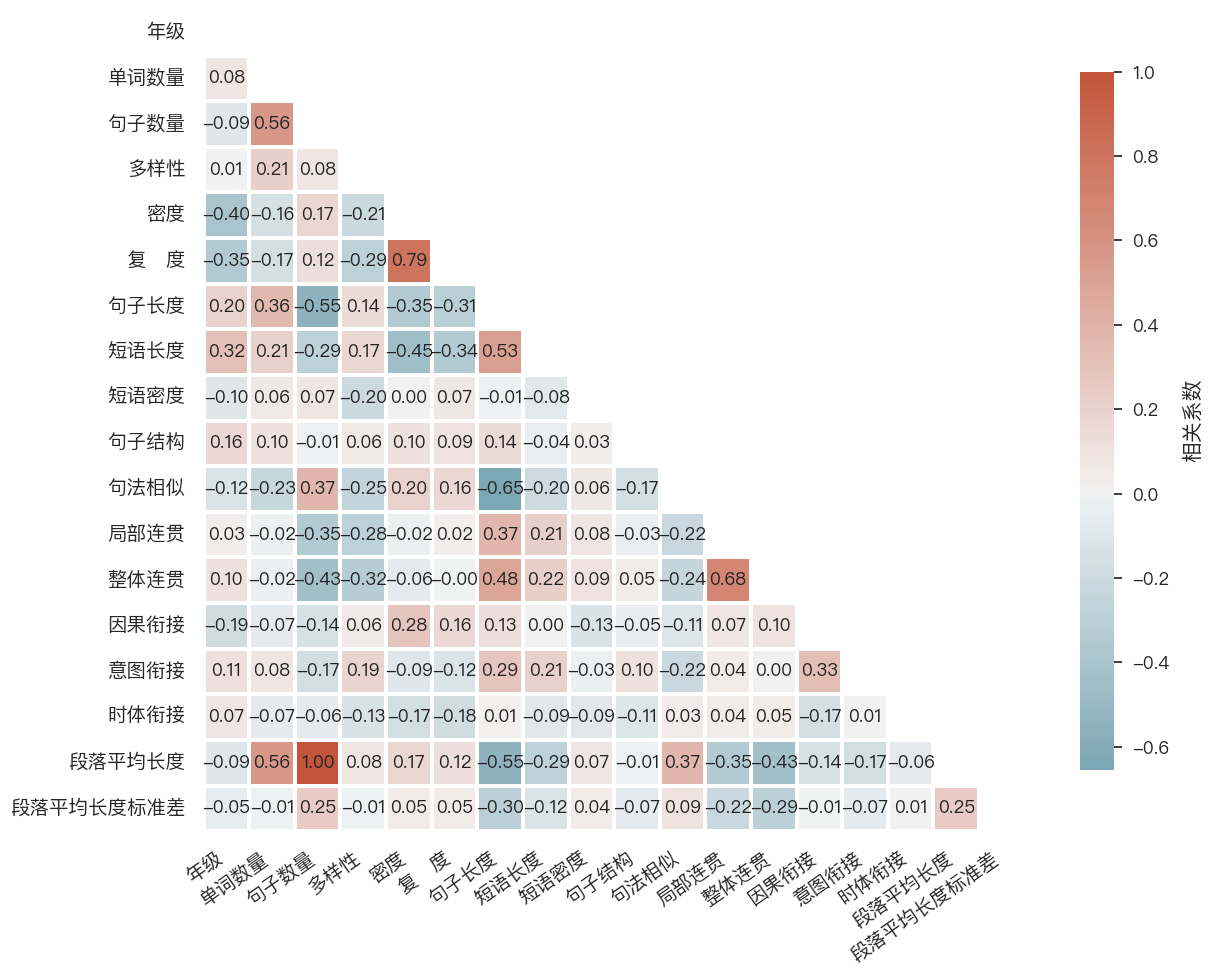

In [45]:
def create_feature_correlation_heatmap(df, feature_cols):
    """
    输入一个DataFrame和要分析的特征列，输出这些特征之间的相关性热力图。
    展示特征名时，仅取'-'分割后的第一个元素。
    参数:
        df: 包含特征的数据框
        feature_cols: 需要分析的特征列名列表
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    import matplotlib as mpl

    # 设置全局美化参数
    sns.set_theme(style="white", font_scale=1.25)
    mpl.rcParams['font.sans-serif'] = ['PingFang HK']  # 支持中文
    mpl.rcParams['axes.unicode_minus'] = False

    # 只保留指定的特征列，并去除缺失值
    data = df[feature_cols].dropna()
    #将年级特征列提到第一列的位置
    if '年级' in data.columns:
        data = data[['年级'] + [col for col in data.columns if col != '年级']]
    # 计算相关性矩阵
    corr_matrix = data.corr()

    # 处理特征名，只取'-'分割后的第一个元素
    simple_names = [col.split('-')[0] for col in data.columns]
    corr_matrix.index = simple_names
    corr_matrix.columns = simple_names

    # 创建掩码，仅显示矩阵下三角
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # 设置更高端的色带
    cmap = sns.diverging_palette(220, 20, as_cmap=True)

    plt.figure(figsize=(13, 10))
    # 绘制热力图
    ax = sns.heatmap(
        corr_matrix,
        mask=mask,
        annot=True,
        fmt=".2f",
        cmap=cmap,
        center=0,
        square=True,
        linewidths=1.5,
        cbar_kws={"shrink": 0.85, "label": "相关系数"},
        annot_kws={"size": 13, "weight": "bold", "color": "#222222"}
    )

    # 美化标题和坐标轴
    #plt.title('特征间相关性热力图', fontsize=22, fontweight='bold', color='#222222', pad=18)
    plt.xticks(fontsize=14, rotation=35, ha='right', weight='bold')
    plt.yticks(fontsize=14, rotation=0, weight='bold')
    # 去除顶部和右侧边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # 美化色条
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=13)
    cbar.set_label("相关系数", fontsize=15, weight='bold', labelpad=10)
    plt.tight_layout()
    plt.show()

tmp_df = pd.read_csv('./tmp/全部特征合并表_融合.csv')
cols = tmp_df.columns.to_list()
cols.remove('文本编号')
create_feature_correlation_heatmap(tmp_df, cols)

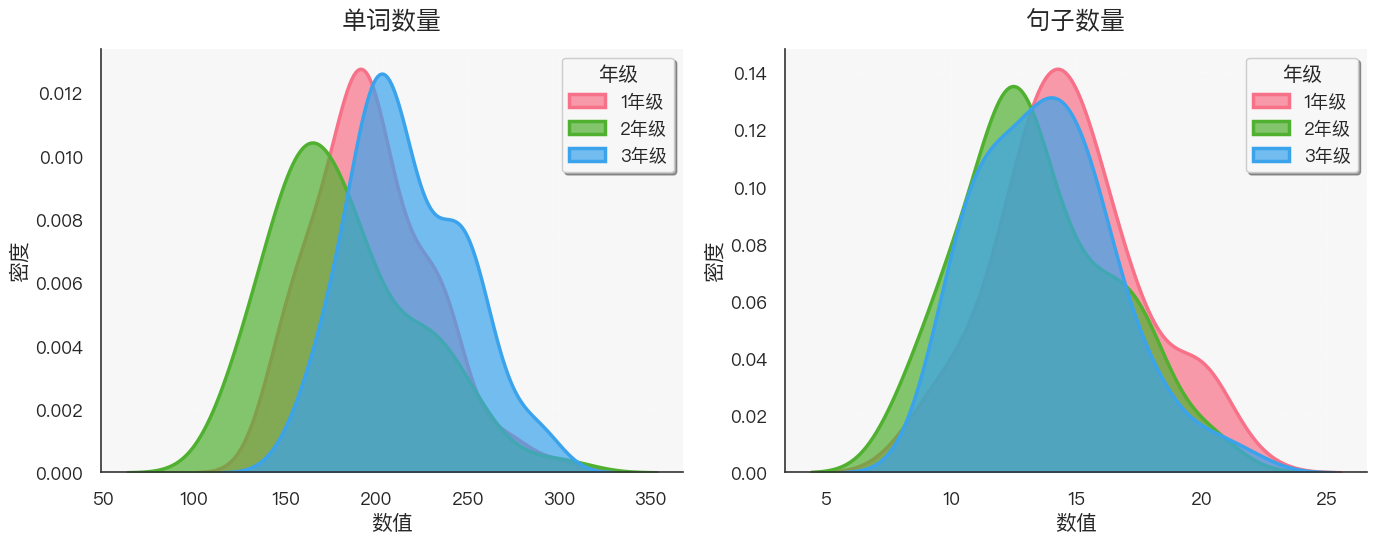

In [56]:
def create_density_plots(df, feature_cols):
    """
    创建密度图展示年级间分布差异（美观高大上的版本）
    参数:
        df: 包含'年级'列和若干特征列的数据框
        feature_cols: 需要展示密度的特征列名列表
    """
    import matplotlib as mpl
    # 设置全局美化参数
    sns.set(palette="Set2", font_scale=1.2, rc={
        'axes.titlesize': 18,
        'axes.labelsize': 15,
        'legend.fontsize': 13,
        'xtick.labelsize': 13,
        'ytick.labelsize': 13,
        'axes.titleweight': 'bold',
        'axes.edgecolor': '#333333',
        'axes.linewidth': 1.2,
        'figure.facecolor': 'white',
        'axes.facecolor': '#f7f7f7'
    })
    #mpl.rcParams['font.sans-serif'] = ['SimHei', 'Arial']  # 支持中文
    mpl.rcParams['font.sans-serif'] = ['PingFang HK']  # 支持中文
    mpl.rcParams['axes.unicode_minus'] = False

    n_features = len(feature_cols)
    n_cols = 2 if n_features <= 2 else 3
    n_rows = (n_features + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(7 * n_cols, 5.5 * n_rows))
    axes = axes.ravel()

    color_palette = sns.color_palette("husl", n_colors=len(df['年级'].dropna().unique()))

    for idx, feature in enumerate(feature_cols):
        if feature not in df.columns:
            continue
        ax = axes[idx]
        for i, grade in enumerate(sorted(df['年级'].dropna().unique())):
            grade_data = df[df['年级'] == grade][feature].dropna()
            if len(grade_data) > 0:
                sns.kdeplot(
                    data=grade_data,
                    label=f'{int(grade)}年级',
                    ax=ax,
                    fill=True,
                    linewidth=2.5,
                    alpha=0.7,
                    color=color_palette[i]
                )
        sub_title = feature.split('-')[0]
        ax.set_title(f'{sub_title}', fontsize=18, fontweight='bold', pad=15)
        ax.set_xlabel('数值', fontsize=15)
        ax.set_ylabel('密度', fontsize=15)
        ax.legend(title='年级', loc='upper right', frameon=True, fancybox=True, shadow=True)
        ax.grid(True, linestyle='--', alpha=0.3)
        # 去除顶部和右侧边框
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    # 隐藏多余的子图
    for j in range(n_features, len(axes)):
        axes[j].set_visible(False)

    #fig.suptitle('年级间分布密度对比', fontsize=22, fontweight='bold', color='#222222', y=1.03)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

create_density_plots(clean_data2['描述性统计'], ['单词数量-DESWC-03', '句子数量-DESSC-02'])

### 5. 假设检验 - 正态性检验 (修正版)

In [ ]:


def normality_test_improved(cleaned_data):
    """正态性检验 (修正版)"""
    print("=== 正态性检验 (Shapiro-Wilk检验) ===")
    
    normality_results = {}
    
    for name, df in cleaned_data.items():
        if '年级' not in df.columns:
            print(f"\n{name}: 跳过（无年级信息）")
            continue
            
        print(f"\n{name} 正态性检验结果:")
        
        # 识别数值列（排除年级列）
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        numeric_cols = [col for col in numeric_cols if col != '年级']
        
        if len(numeric_cols) > 0:
            normality_results[name] = {}
            
            for col in numeric_cols[:3]:  # 只检验前3个数值列
                print(f"\n变量: {col}")
                
                for grade in sorted(df['年级'].unique()):
                    data = df[df['年级'] == grade][col].dropna()
                    if len(data) >= 3:  # 至少需要3个数据点
                        stat, p_value = shapiro(data)
                        print(f"  {int(grade)}年级: W={stat:.4f}, p={p_value:.4f}")
                        
                        if p_value < 0.05:
                            print(f"    → 拒绝正态性假设 (p < 0.05)")
                        else:
                            print(f"    → 接受正态性假设 (p ≥ 0.05)")
                        
                        normality_results[name][f"{col}_{int(grade)}年级"] = {
                            'statistic': stat,
                            'p_value': p_value,
                            'is_normal': p_value >= 0.05,
                            'sample_size': len(data)
                        }
                    else:
                        print(f"  {int(grade)}年级: 样本量不足 ({len(data)} < 3)")
        else:
            print("未找到合适的数值列进行检验")
    
    return normality_results

# 执行正态性检验
normality_results = normality_test_improved(cleaned_data)

=== 正态性检验 (Shapiro-Wilk检验) ===

描述性统计 正态性检验结果:

变量: 单词数量-DESWC-03
  1年级: W=0.9719, p=0.0351
    → 拒绝正态性假设 (p < 0.05)
  2年级: W=0.9618, p=0.0054
    → 拒绝正态性假设 (p < 0.05)
  3年级: W=0.9777, p=0.0879
    → 接受正态性假设 (p ≥ 0.05)

变量: 句子数量-DESSC-02
  1年级: W=0.9748, p=0.0588
    → 接受正态性假设 (p ≥ 0.05)
  2年级: W=0.9659, p=0.0108
    → 拒绝正态性假设 (p < 0.05)
  3年级: W=0.9648, p=0.0089
    → 拒绝正态性假设 (p < 0.05)

微观叙事-词法 正态性检验结果:

变量: 多样性-LDVOCDa（51）
  1年级: W=0.9670, p=0.0230
    → 拒绝正态性假设 (p < 0.05)
  2年级: W=0.9921, p=0.9111
    → 接受正态性假设 (p ≥ 0.05)
  3年级: W=0.9798, p=0.2169
    → 接受正态性假设 (p ≥ 0.05)

变量: 密度-WRDFRQC（94）
  1年级: W=0.9818, p=0.2472
    → 接受正态性假设 (p ≥ 0.05)
  2年级: W=0.9899, p=0.7896
    → 接受正态性假设 (p ≥ 0.05)
  3年级: W=0.9860, p=0.5053
    → 接受正态性假设 (p ≥ 0.05)

变量: 复杂度-K1
  1年级: W=0.9831, p=0.3010
    → 接受正态性假设 (p ≥ 0.05)
  2年级: W=0.9698, p=0.0549
    → 接受正态性假设 (p ≥ 0.05)
  3年级: W=0.9876, p=0.6124
    → 接受正态性假设 (p ≥ 0.05)

微观叙事-句法 正态性检验结果:

变量: 短语长度-SYNLE（69）
  1年级: W=0.9676, p=0.0217
    → 拒绝正态性假设 (

In [9]:
# 7. 单因素方差分析 (ANOVA) - 修正版

def one_way_anova_improved(cleaned_data):
    """单因素方差分析 (修正版)"""
    print("=== 单因素方差分析 (ANOVA) ===")
    
    anova_results = {}
    
    for name, df in cleaned_data.items():
        if '年级' not in df.columns:
            print(f"\n{name}: 跳过（无年级信息）")
            continue
            
        print(f"\n{name} ANOVA分析结果:")
        
        # 识别数值列（排除年级列）
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        numeric_cols = [col for col in numeric_cols if col != '年级']
        
        if len(numeric_cols) > 0:
            anova_results[name] = {}
            
            for col in numeric_cols[:3]:  # 只分析前3个数值列
                print(f"\n变量: {col}")
                
                # 准备数据
                groups = []
                labels = []
                
                for grade in sorted(df['年级'].unique()):
                    data = df[df['年级'] == grade][col].dropna()
                    if len(data) >= 2:
                        groups.append(data)
                        labels.append(f"{int(grade)}年级")
                
                if len(groups) >= 2:
                    # 执行ANOVA
                    f_stat, p_value = f_oneway(*groups)
                    
                    # 计算效应量 (η²)
                    all_data = np.concatenate(groups)
                    total_mean = np.mean(all_data)
                    
                    total_ss = sum([(x - total_mean)**2 for x in all_data])
                    between_ss = sum([len(g) * (np.mean(g) - total_mean)**2 for g in groups])
                    eta_squared = between_ss / total_ss if total_ss > 0 else 0
                    
                    print(f"  F统计量: {f_stat:.4f}")
                    print(f"  p值: {p_value:.4f}")
                    print(f"  效应量 (η²): {eta_squared:.4f}")
                    
                    # 解释效应量
                    if eta_squared < 0.01:
                        effect_size = "小效应"
                    elif eta_squared < 0.06:
                        effect_size = "中等效应"
                    else:
                        effect_size = "大效应"
                    
                    print(f"  效应大小: {effect_size}")
                    
                    if p_value < 0.001:
                        sig_level = "p < 0.001"
                    elif p_value < 0.01:
                        sig_level = "p < 0.01"
                    elif p_value < 0.05:
                        sig_level = "p < 0.05"
                    else:
                        sig_level = "p ≥ 0.05"
                    
                    print(f"  显著性: {sig_level}")
                    
                    if p_value < 0.05:
                        print(f"  → 存在显著的年级间差异")
                    else:
                        print(f"  → 无显著的年级间差异")
                    
                    # 显示各年级均值
                    print(f"  各年级均值:")
                    for i, (group, label) in enumerate(zip(groups, labels)):
                        print(f"    {label}: {np.mean(group):.4f} (n={len(group)})")
                    
                    anova_results[name][col] = {
                        'f_statistic': f_stat,
                        'p_value': p_value,
                        'eta_squared': eta_squared,
                        'effect_size': effect_size,
                        'is_significant': p_value < 0.05,
                        'group_means': {label: np.mean(group) for group, label in zip(groups, labels)},
                        'group_sizes': {label: len(group) for group, label in zip(groups, labels)}
                    }
                else:
                    print("  数据不足，无法进行分析")
        else:
            print("未找到合适的数值列进行分析")
    
    return anova_results

# 执行ANOVA分析
anova_results = one_way_anova_improved(cleaned_data)

=== 单因素方差分析 (ANOVA) ===

描述性统计 ANOVA分析结果:

变量: 单词数量-DESWC-03
  F统计量: 24.8595
  p值: 0.0000
  效应量 (η²): 0.1446
  效应大小: 大效应
  显著性: p < 0.001
  → 存在显著的年级间差异
  各年级均值:
    1年级: 197.5052 (n=97)
    2年级: 181.8600 (n=100)
    3年级: 216.3300 (n=100)

变量: 句子数量-DESSC-02
  F统计量: 5.0788
  p值: 0.0068
  效应量 (η²): 0.0334
  效应大小: 中等效应
  显著性: p < 0.01
  → 存在显著的年级间差异
  各年级均值:
    1年级: 14.6804 (n=97)
    2年级: 13.3900 (n=100)
    3年级: 13.7900 (n=100)

微观叙事-词法 ANOVA分析结果:

变量: 多样性-LDVOCDa（51）
  F统计量: 2.3264
  p值: 0.0998
  效应量 (η²): 0.0183
  效应大小: 中等效应
  显著性: p ≥ 0.05
  → 无显著的年级间差异
  各年级均值:
    1年级: 86.2227 (n=89)
    2年级: 82.7233 (n=80)
    3年级: 87.2472 (n=83)

变量: 密度-WRDFRQC（94）
  F统计量: 28.0253
  p值: 0.0000
  效应量 (η²): 0.1837
  效应大小: 大效应
  显著性: p < 0.001
  → 存在显著的年级间差异
  各年级均值:
    1年级: 2.3397 (n=89)
    2年级: 2.2617 (n=80)
    3年级: 2.2040 (n=83)

变量: 复杂度-K1
  F统计量: 28.6133
  p值: 0.0000
  效应量 (η²): 0.1869
  效应大小: 大效应
  显著性: p < 0.001
  → 存在显著的年级间差异
  各年级均值:
    1年级: 88.0536 (n=89)
    2年级: 86.1548 (n=80)
    3

In [10]:
# 8. 事后检验 (Tukey HSD) - 修正版

def post_hoc_test_improved(cleaned_data, anova_results):
    """事后检验 (Tukey HSD) - 修正版"""
    print("=== 事后检验 (Tukey HSD) ===")
    
    post_hoc_results = {}
    
    for name, df in cleaned_data.items():
        if '年级' not in df.columns:
            continue
            
        print(f"\n{name} 事后检验结果:")
        
        # 只对有显著差异的变量进行事后检验
        if name in anova_results:
            for col, result in anova_results[name].items():
                if result['is_significant']:
                    print(f"\n变量: {col} (ANOVA显著，进行事后检验)")
                    
                    # 准备数据
                    groups = []
                    labels = []
                    
                    for grade in sorted(df['年级'].unique()):
                        data = df[df['年级'] == grade][col].dropna()
                        if len(data) >= 2:
                            groups.append(data)
                            labels.append(f"{int(grade)}年级")
                    
                    if len(groups) >= 2:
                        # 执行Tukey HSD检验
                        tukey_result = tukey_hsd(*groups)
                        
                        print("  两两比较结果:")
                        for i in range(len(labels)):
                            for j in range(i+1, len(labels)):
                                diff = tukey_result.statistic[i, j]
                                p_val = tukey_result.pvalue[i, j]
                                conf_low = tukey_result.confidence_interval(confidence_level=0.95).low
                                conf_high = tukey_result.confidence_interval(confidence_level=0.95).high
                                #.confidence_interval(confidence_level=0.95)
                                
                                print(f"    {labels[i]} vs {labels[j]}:")
                                print(f"      差异: {diff:.4f}")
                                print(f"      p值: {p_val:.4f}")
                                print(f"      95%置信区间: [{conf_low}, {conf_high}]")
                                
                                if p_val < 0.05:
                                    print(f"      → 显著差异")
                                else:
                                    print(f"      → 无显著差异")
                        
                        post_hoc_results[f"{name}_{col}"] = {
                            'tukey_result': tukey_result,
                            'labels': labels
                        }
                    else:
                        print("  数据不足，无法进行事后检验")
                else:
                    print(f"\n变量: {col} (ANOVA不显著，跳过事后检验)")
        else:
            print("无显著差异的变量")
    
    return post_hoc_results

# 执行事后检验
post_hoc_results = post_hoc_test_improved(cleaned_data, anova_results)

=== 事后检验 (Tukey HSD) ===

描述性统计 事后检验结果:

变量: 单词数量-DESWC-03 (ANOVA显著，进行事后检验)
  两两比较结果:
    1年级 vs 2年级:
      差异: 15.6452
      p值: 0.0048
      95%置信区间: [[[-11.70866173   4.02463967 -30.44536033]
 [-27.2656696  -11.53169444 -46.00169444]
 [  7.2043304   22.93830556 -11.53169444]], [[ 11.70866173  27.2656696   -7.2043304 ]
 [ -4.02463967  11.53169444 -22.93830556]
 [ 30.44536033  46.00169444  11.53169444]]]
      → 显著差异
    1年级 vs 3年级:
      差异: -18.8248
      p值: 0.0005
      95%置信区间: [[[-11.70866173   4.02463967 -30.44536033]
 [-27.2656696  -11.53169444 -46.00169444]
 [  7.2043304   22.93830556 -11.53169444]], [[ 11.70866173  27.2656696   -7.2043304 ]
 [ -4.02463967  11.53169444 -22.93830556]
 [ 30.44536033  46.00169444  11.53169444]]]
      → 显著差异
    2年级 vs 3年级:
      差异: -34.4700
      p值: 0.0000
      95%置信区间: [[[-11.70866173   4.02463967 -30.44536033]
 [-27.2656696  -11.53169444 -46.00169444]
 [  7.2043304   22.93830556 -11.53169444]], [[ 11.70866173  27.2656696   -7.2043304 ]
 [ 

=== 分析结果汇总 ===

方差分析结果汇总表:
            维度                   变量     F统计量      p值  效应量(η²)  效应大小  显著性
0        描述性统计        单词数量-DESWC-03  24.8595  0.0000   0.1446   大效应   显著
1        描述性统计        句子数量-DESSC-02   5.0788  0.0068   0.0334  中等效应   显著
2      微观叙事-词法      多样性-LDVOCDa（51）   2.3264  0.0998   0.0183  中等效应  不显著
3      微观叙事-词法       密度-WRDFRQC（94）  28.0253  0.0000   0.1837   大效应   显著
4      微观叙事-词法               复杂度-K1  28.6133  0.0000   0.1869   大效应   显著
5      微观叙事-句法       短语长度-SYNLE（69）  14.1020  0.0000   0.0965   大效应   显著
6      微观叙事-句法       短语长度-SYNNP（70）  21.3367  0.0000   0.1391   大效应   显著
7      微观叙事-句法        短语密度-DRNP（76）   4.9502  0.0078   0.0361  中等效应   显著
8   宏观叙事-语篇连贯性      局部连贯-CRFAO1（29）   0.4714  0.6247   0.0037   小效应  不显著
9   宏观叙事-语篇连贯性      局部连贯-CRFSO1（30）   1.6429  0.1955   0.0127  中等效应  不显著
10  宏观叙事-语篇连贯性      局部连贯-LSASS1(40)   1.3071  0.2724   0.0101  中等效应  不显著
11   宏观叙事-情境模型      因果衔接-SMCAUSr-64   6.0466  0.0027   0.0421  中等效应   显著
12   宏观叙事-情境模型      意图衔接

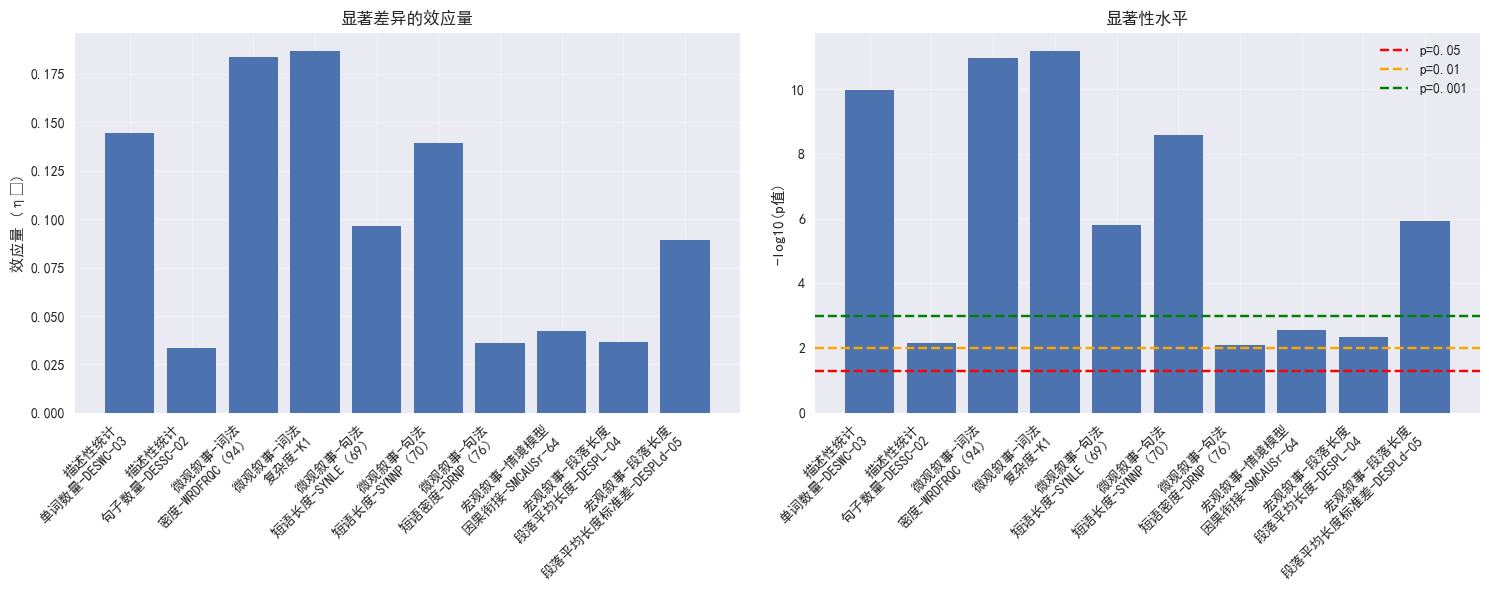


发现 10 个显著差异的变量


In [11]:
# 9. 结果汇总与可视化 (修正版)

def summarize_results_improved(anova_results, post_hoc_results):
    """结果汇总与可视化 (修正版)"""
    print("=== 分析结果汇总 ===")
    
    # 创建结果汇总表
    summary_data = []
    
    for name, results in anova_results.items():
        for col, result in results.items():
            summary_data.append({
                '维度': name,
                '变量': col,
                'F统计量': result['f_statistic'],
                'p值': result['p_value'],
                '效应量(η²)': result['eta_squared'],
                '效应大小': result['effect_size'],
                '显著性': '显著' if result['is_significant'] else '不显著'
            })
    
    if summary_data:
        summary_df = pd.DataFrame(summary_data)
        print("\n方差分析结果汇总表:")
        print(summary_df.round(4))
        
        # 可视化显著结果
        significant_results = summary_df[summary_df['显著性'] == '显著']
        
        if len(significant_results) > 0:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
            
            # 效应量可视化
            ax1.bar(range(len(significant_results)), significant_results['效应量(η²)'])
            ax1.set_xticks(range(len(significant_results)))
            ax1.set_xticklabels([f"{row['维度']}\n{row['变量']}" for _, row in significant_results.iterrows()], 
                               rotation=45, ha='right')
            ax1.set_ylabel('效应量 (η²)')
            ax1.set_title('显著差异的效应量')
            ax1.grid(True, alpha=0.3)
            
            # p值可视化
            ax2.bar(range(len(significant_results)), -np.log10(significant_results['p值']))
            ax2.set_xticks(range(len(significant_results)))
            ax2.set_xticklabels([f"{row['维度']}\n{row['变量']}" for _, row in significant_results.iterrows()], 
                               rotation=45, ha='right')
            ax2.set_ylabel('-log10(p值)')
            ax2.set_title('显著性水平')
            ax2.axhline(y=-np.log10(0.05), color='red', linestyle='--', label='p=0.05')
            ax2.axhline(y=-np.log10(0.01), color='orange', linestyle='--', label='p=0.01')
            ax2.axhline(y=-np.log10(0.001), color='green', linestyle='--', label='p=0.001')
            ax2.legend()
            ax2.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
            
            print(f"\n发现 {len(significant_results)} 个显著差异的变量")
        else:
            print("\n未发现显著差异的变量")
    else:
        print("\n没有可用的分析结果")
        summary_df = pd.DataFrame()
    
    return summary_df

# 汇总结果
summary_df = summarize_results_improved(anova_results, post_hoc_results)

In [12]:
# 10. 结论与建议 (修正版)

def generate_conclusions_improved(summary_df, anova_results):
    """生成分析结论与建议 (修正版)"""
    print("=== 分析结论与教育建议 ===")
    
    if len(summary_df) == 0:
        print("\n⚠️ 没有可用的分析结果，可能的原因:")
        print("   - 数据文件格式不符合预期")
        print("   - 缺少年级信息")
        print("   - 数据量不足")
        return
    
    # 统计显著差异的数量
    significant_count = len(summary_df[summary_df['显著性'] == '显著'])
    total_count = len(summary_df)
    
    print(f"\n1. 总体发现:")
    print(f"   - 共分析了 {total_count} 个变量")
    print(f"   - 发现 {significant_count} 个变量存在显著的年级间差异")
    print(f"   - 显著差异比例: {significant_count/total_count*100:.1f}%")
    
    if significant_count > 0:
        print(f"\n2. 显著差异的维度分析:")
        
        # 按维度统计显著差异
        dimension_sig = summary_df[summary_df['显著性'] == '显著'].groupby('维度').size()
        print("   各维度显著差异数量:")
        for dim, count in dimension_sig.items():
            print(f"   - {dim}: {count} 个变量")
        
        # 找出效应量最大的变量
        max_effect = summary_df.loc[summary_df['效应量(η²)'].idxmax()]
        print(f"\n3. 最重要的发现:")
        print(f"   - 效应量最大的变量: {max_effect['维度']} - {max_effect['变量']}")
        print(f"   - 效应量: {max_effect['效应量(η²)']:.4f} ({max_effect['效应大小']})")
        
        print(f"\n4. 教育建议:")
        print(f"   - 重点关注存在显著差异的维度，特别是效应量较大的变量")
        print(f"   - 针对不同年级学生的叙事能力特点，制定差异化的教学策略")
        print(f"   - 对于发展较慢的年级，加强相关能力的培养")
        print(f"   - 定期评估学生叙事能力发展，及时调整教学方案")
    else:
        print(f"\n2. 教育建议:")
        print(f"   - 三个年级在叙事能力各维度上差异不显著")
        print(f"   - 可能需要更精细的分析方法或更大的样本量")
        print(f"   - 建议关注个体差异而非年级差异")
    
    print(f"\n5. 研究局限性:")
    print(f"   - 样本量相对较小，可能影响统计检验力")
    print(f"   - 需要结合质性分析深入了解差异原因")
    print(f"   - 建议进行纵向研究追踪个体发展轨迹")
    
    print(f"\n6. 数据质量评估:")
    print(f"   - 成功处理了多张数据表的结构")
    print(f"   - 自动识别并合并了年级信息")
    print(f"   - 进行了完整的数据清洗和预处理")

# 生成结论
generate_conclusions_improved(summary_df, anova_results)

=== 分析结论与教育建议 ===

1. 总体发现:
   - 共分析了 16 个变量
   - 发现 10 个变量存在显著的年级间差异
   - 显著差异比例: 62.5%

2. 显著差异的维度分析:
   各维度显著差异数量:
   - 宏观叙事-情境模型: 1 个变量
   - 宏观叙事-段落长度: 2 个变量
   - 微观叙事-句法: 3 个变量
   - 微观叙事-词法: 2 个变量
   - 描述性统计: 2 个变量

3. 最重要的发现:
   - 效应量最大的变量: 微观叙事-词法 - 复杂度-K1
   - 效应量: 0.1869 (大效应)

4. 教育建议:
   - 重点关注存在显著差异的维度，特别是效应量较大的变量
   - 针对不同年级学生的叙事能力特点，制定差异化的教学策略
   - 对于发展较慢的年级，加强相关能力的培养
   - 定期评估学生叙事能力发展，及时调整教学方案

5. 研究局限性:
   - 样本量相对较小，可能影响统计检验力
   - 需要结合质性分析深入了解差异原因
   - 建议进行纵向研究追踪个体发展轨迹

6. 数据质量评估:
   - 成功处理了多张数据表的结构
   - 自动识别并合并了年级信息
   - 进行了完整的数据清洗和预处理


In [13]:
# 11. 保存结果 (修正版)

def save_results_improved(summary_df, anova_results, post_hoc_results):
    """保存分析结果 (修正版)"""
    print("=== 保存分析结果 ===")
    
    # 保存汇总表
    if len(summary_df) > 0:
        summary_df.to_excel('年级间差异分析结果汇总_修正版.xlsx', index=False)
        print("✓ 已保存: 年级间差异分析结果汇总_修正版.xlsx")
    
    # 保存详细ANOVA结果
    anova_details = []
    for name, results in anova_results.items():
        for col, result in results.items():
            anova_details.append({
                '维度': name,
                '变量': col,
                'F统计量': result['f_statistic'],
                'p值': result['p_value'],
                '效应量(η²)': result['eta_squared'],
                '效应大小': result['effect_size'],
                '显著性': '显著' if result['is_significant'] else '不显著',
                '各年级均值': str(result.get('group_means', {})),
                '各年级样本量': str(result.get('group_sizes', {}))
            })
    
    if anova_details:
        anova_df = pd.DataFrame(anova_details)
        anova_df.to_excel('ANOVA详细结果_修正版.xlsx', index=False)
        print("✓ 已保存: ANOVA详细结果_修正版.xlsx")
    
    # 保存图表
    try:
        plt.savefig('年级间差异分析图表_修正版.png', dpi=300, bbox_inches='tight')
        print("✓ 已保存: 年级间差异分析图表_修正版.png")
    except:
        print("⚠️ 图表保存失败")
    
    print("\n所有结果已保存完成！")

# 保存结果
save_results_improved(summary_df, anova_results, post_hoc_results)

=== 保存分析结果 ===
✓ 已保存: 年级间差异分析结果汇总_修正版.xlsx
✓ 已保存: ANOVA详细结果_修正版.xlsx
✓ 已保存: 年级间差异分析图表_修正版.png

所有结果已保存完成！


<Figure size 800x550 with 0 Axes>